In [1]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

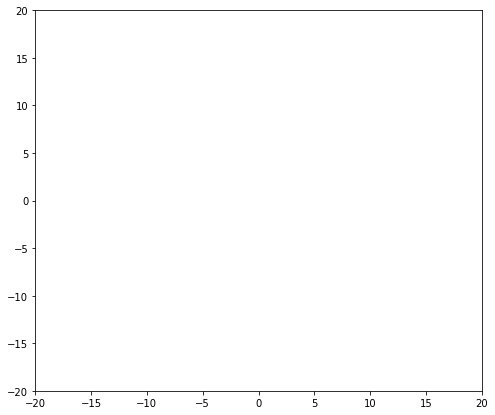

In [12]:

#random walk function
def random_walk(num_steps):
    #initializing boundary values
    xboundary = 20
    yboundary= 20
    #size of the step (mean free path of water in Angstroms)
    step=2.5
    #assigning initial particles to the left half of the boundary
    xi = np.random.uniform(-xboundary,0)
    yi = np.random.uniform(-yboundary,yboundary)
    
    xpos=[xi]
    ypos=[yi]
    

    for i in range(0,num_steps):
        #randomly picking theta and direction values
        theta = np.random.uniform(0,2*np.pi)
        direction = np.random.uniform(0,1)
        
        #based on randomly generated values the particle moves with either a positive or negative radius
        #the step size is determined by the mean free path of water
        if (direction>.5):
            r=step
        else:
            r=-step
        
        #random angle to move the particle in
        x=r*np.cos(theta)+xpos[i]
        y=r*np.sin(theta)+ypos[i]
        
        
        #boundary protection that reverses direction of particle if it hits the boundary
        if (x>xboundary or x<-xboundary):
            x=-r*np.cos(theta)+xpos[i]
            
        if (y>yboundary or y<-yboundary):
            y=-r*np.sin(theta)+ypos[i]
        
        xpos.append(x)
        ypos.append(y)
        
    return xpos,ypos

#setting plot boundary
xboundary = 20
yboundary= 20

#initializing plot
f,ax = plt.subplots(figsize=(8,7))
camera = Camera(f)
ax.set_ylim(-yboundary,yboundary)
ax.set_xlim(-xboundary,xboundary)

#initializing particles
steps =100
num_particles = 500
x_pos =[]
y_pos =[]

#creates all the particles for the simulation
for i in range (0, num_particles):
    tempx, tempy = random_walk(steps)
    x_pos.append(tempx)
    y_pos.append(tempy)

#plots all the particles for each time step and animates into a gif

# for j in range (0,steps):    
#     for k in range (0,num_particles):
#         ax.scatter(x_pos[k][j],y_pos[k][j], color = "orange")
#     camera.snap()

# animation = camera.animate()

# animation.save('Partition-500-2.gif', writer='pillow', fps=10)


In [13]:

r_squared_list=[]
r_final = []

#computes the average r^2 value for the particles
for i in range(0,400):
    x, y = random_walk(400)
    #squares the displacement values for each time step
    r_squared = [ (x[i]-x[0])**2 + (y[i]-y[0])**2 for i in range (0,len(x))]
    r_squared_list.append(r_squared)

#averages the r^2 value for each time step
for j in range (0,len(r_squared_list)):  
    total=0
    #loops through all particles and average the r^2 value for that time step
    for k in range (0,len(r_squared_list)):  
        total += r_squared_list[k][j]
        
    average = total/len(r_squared_list)
    r_final.append(average)
    


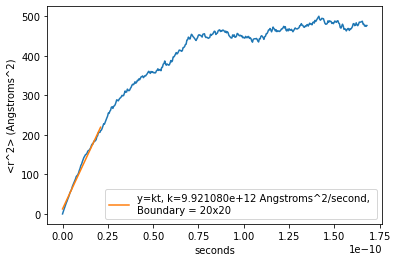

In [14]:
#plotting the average r^2 value for each time step
t1=np.linspace(0,50,50)
t2=np.linspace(0,400,400)
#only first 50 points used for fit to ensure reflections of particles were minimized
k1,b1=np.polyfit(t1,r_final[:50],1)
y=k1*t1+b1
#converting the t from steps to seconds
plt.plot(t2*4.2e-13,r_final)
#formatting k value from angstroms^2/step to angstroms^2/second
plt.plot(t1*4.2e-13,y, label = "y=kt, k="+str("{:e}".format(k1*2.4e12))+" Angstroms^2/second, \nBoundary = 20x20")
plt.xlabel("seconds")
plt.ylabel("<r^2> (Angstroms^2)")
plt.legend()

In [11]:
k1

5.563083431670829

100